In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import gudhi as gd
import matplotlib.pyplot as plt
from itertools import combinations,tee
from scipy.special import binom
from math import dist

In [2]:
import fastforman4 as ff

In [76]:
def cliques_networkx(G,k):
    """An adaptation of  netowkrx algorithm for finding cliques up to fixed dimensinon.
    Inputs: G, a networkx simple undirected network.
        k, the maximum simplex dimension.
    Output: a generator with all the clique with size at most k+1."""
    Cl = (i for i in nx.find_cliques(G))
    C = (tuple(sorted(c)) for c in Cl)
    C=tee(C,k+1)
    for i in range(k+1):
        K=( i for i in set(c for mc in C[i] for c in combinations(mc, i+1)) if len(i)>1 )
        for c in K:
           
             yield c


In [3]:
def all_cells(G,k):
    Cl = (i for i in nx.find_cliques(G))
    #k=G.number_of_nodes()
    C = (tuple(sorted(c)) for c in Cl)
    C=tee(C,k+1)
    for i in range(k+1):
        K=( i for i in set(c for mc in C[i] for c in combinations(mc, i+1)) if len(i)>1)
        for c in K:
            yield c

In [4]:
def gen_ERG(n,den):
    comb=binom(n,2)
    G=nx.erdos_renyi_graph(n,1)
    for e in G.edges():
        G[e[0]][e[1]]["weight"]=np.random.uniform(0,1)
    df=pd.DataFrame()
    df["edge"]=list(G.edges())
    df["weight"]=[G[e[0]][e[1]]["weight"] for e in G.edges()]
    df=df.sort_values("weight").reset_index()
    E=(i for i in df.edge)
    H=nx.Graph()
    H.add_nodes_from(list(G.nodes()))
    counter=0
    pho=0
    while pho<den:
        try:
            e=next(E)
            counter+=1
            pho=counter/comb
            H.add_edge(*e)
        except:
            next
    return H        
            
                    
                     


In [5]:
def gen_RGG(n,den,dim):
    comb=binom(n,2)
    M=np.zeros((n,n))
    D={i:np.random.uniform(0,1,dim) for i in range(n)}
    for pair in combinations([i for i in range(n)],2):
        i,j=pair
        M[i][j]=M[j][i]=dist(D[i],D[j])
    G=nx.from_numpy_array(M)
    df=pd.DataFrame()
    df["edge"]=list(G.edges())
    df["weight"]=[G[e[0]][e[1]]["weight"] for e in G.edges()]
    df=df.sort_values("weight").reset_index()
    E=(i for i in df.edge)
    H=nx.Graph()
    H.add_nodes_from(list(G.nodes()))
    counter=0
    pho=0
    while pho<den:
        try:
            e=next(E)
            counter+=1
            pho=counter/comb
            H.add_edge(*e)
        except:
            next
    return H      

In [6]:
nx.density(gen_ERG(50,0.5))

0.5004081632653061

In [7]:
nx.density(gen_RGG(50,0.5,2))

0.5004081632653061

In [8]:
def gen_BA(n):
    G=nx.barabasi_albert_graph(n,int(n/2)-2)
    return G

In [9]:
den=0.5


In [10]:
def gen_WS(n):
    p=0.25
    G=nx.watts_strogatz_graph(n,int(n/2),p)
    return G

In [20]:
T=ff.compute_FRC_frequency(gen_RGG(50,0.2,2),2)

In [55]:
n=50
FF=[]
model="ERG"
den=0.5
max_dim=4
Exps=[i for i in range(1,3)]
for exp in Exps:
    G=gen_ERG(n,den)
    T=ff.compute_FRC_frequency(gen_ERG(n,den),max_dim)
    for dim in T.keys():
        F=pd.DataFrame()
        F["vals"]=list(T[dim].keys())
        F["frec"]=list(T[dim].values())
        F["dim"]=[dim for i in range(len(F))]
        F["model"]=[model for i in range(len(F))]
        F["exp"]=[exp for i in range(len(F))]
        FF.append(F)
        print(exp,dim)    
FF=pd.concat(FF)        

1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4


In [56]:
n=50
FF1=[]
model="RGG"
den=0.5
max_dim=4
Exps=[i for i in range(1,3)]
for exp in Exps:
    G=gen_ERG(n,den)
    T=ff.compute_FRC_frequency(gen_RGG(n,den,2),max_dim)
    for dim in T.keys():
        F=pd.DataFrame()
        F["vals"]=list(T[dim].keys())
        F["frec"]=list(T[dim].values())
        F["dim"]=[dim for i in range(len(F))]
        F["model"]=[model for i in range(len(F))]
        F["exp"]=[exp for i in range(len(F))]
        FF1.append(F)
        print(exp,dim)    
FF1=pd.concat(FF1)        

1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4


In [68]:
n=50
FF2=[]
model="WS"
den=0.5
max_dim=4
Exps=[i for i in range(1,3)]
for exp in Exps:
    G=gen_ERG(n,den)
    T=ff.compute_FRC_frequency(gen_WS(n),max_dim)
    for dim in T.keys():
        F=pd.DataFrame()
        F["vals"]=list(T[dim].keys())
        F["frec"]=list(T[dim].values())
        F["dim"]=[dim for i in range(len(F))]
        F["model"]=[model for i in range(len(F))]
        F["exp"]=[exp for i in range(len(F))]
        FF2.append(F)
        print(exp,dim)    
FF2=pd.concat(FF2)        

1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4


In [69]:
n=50
FF3=[]
model="BA"
den=0.5
max_dim=4
Exps=[i for i in range(1,3)]
for exp in Exps:
    G=gen_ERG(n,den)
    T=ff.compute_FRC_frequency(gen_BA(n),max_dim)
    for dim in T.keys():
        F=pd.DataFrame()
        F["vals"]=list(T[dim].keys())
        F["frec"]=list(T[dim].values())
        F["dim"]=[dim for i in range(len(F))]
        F["model"]=[model for i in range(len(F))]
        F["exp"]=[exp for i in range(len(F))]
        FF3.append(F)
        print(exp,dim)    
FF3=pd.concat(FF3)        

1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4


In [70]:
Ft=pd.concat([FF,FF1,FF2,FF3])

In [40]:
import seaborn as sns

<AxesSubplot:xlabel='vals', ylabel='frec'>

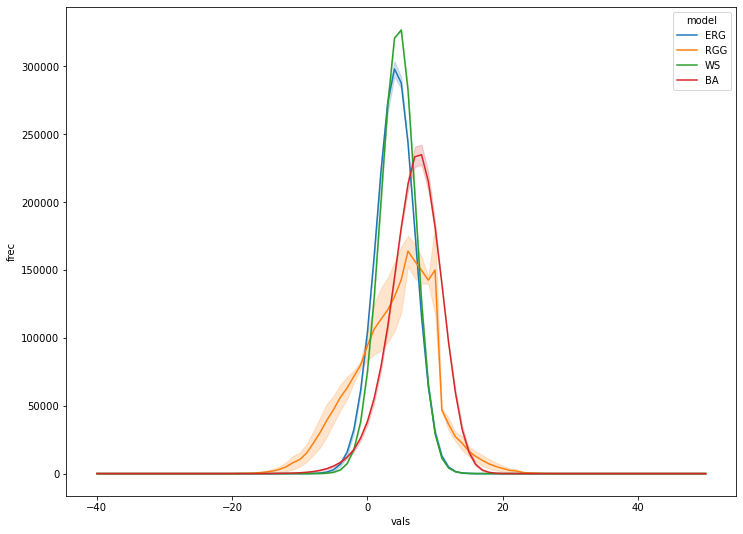

In [71]:
plt.figure(figsize=(12,9))
sns.lineplot(data=Ft[Ft.dim==4],x="vals",y="frec",hue="model")

<AxesSubplot:xlabel='vals', ylabel='frec'>

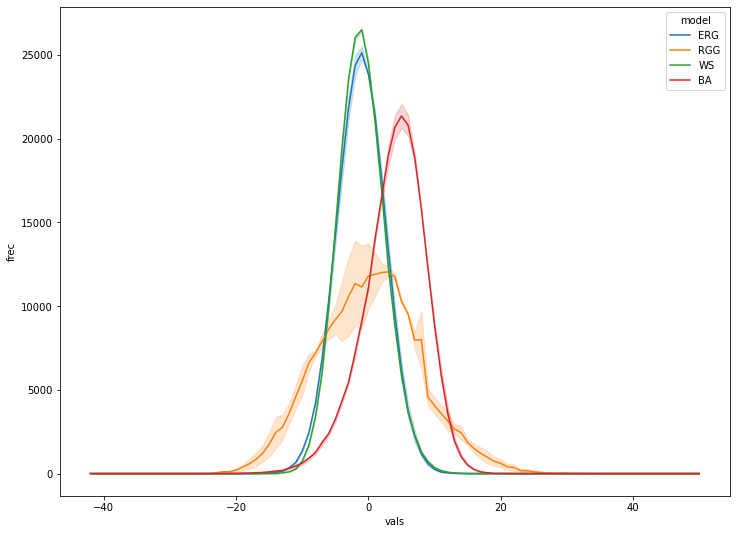

In [72]:
plt.figure(figsize=(12,9))
sns.lineplot(data=Ft[Ft.dim==3],x="vals",y="frec",hue="model")

<AxesSubplot:xlabel='vals', ylabel='frec'>

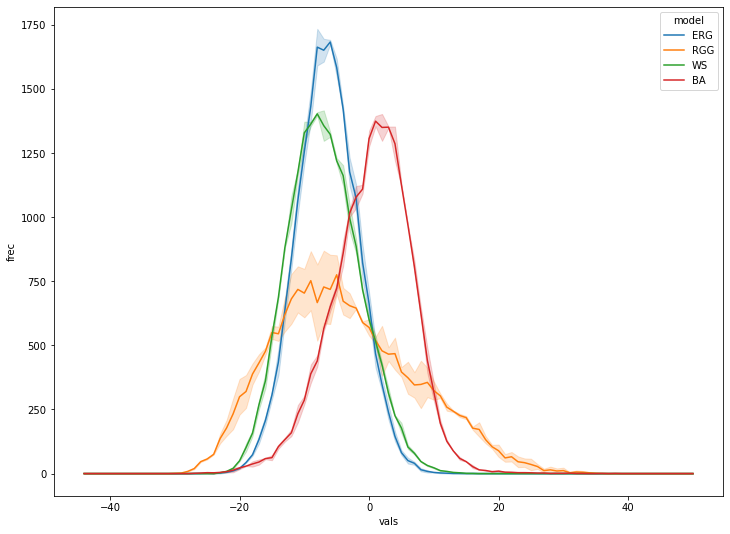

In [73]:
plt.figure(figsize=(12,9))
sns.lineplot(data=Ft[Ft.dim==2],x="vals",y="frec",hue="model")

<AxesSubplot:xlabel='vals', ylabel='frec'>

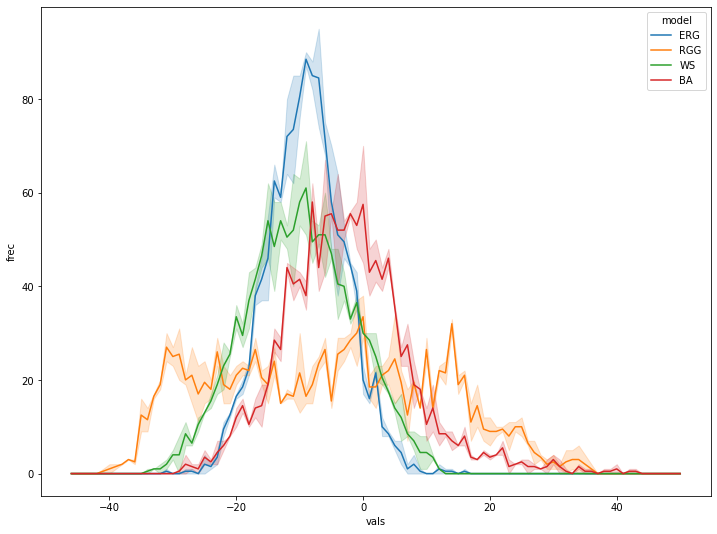

In [75]:
plt.figure(figsize=(12,9))
sns.lineplot(data=Ft[Ft.dim==1],x="vals",y="frec",hue="model")

In [17]:
def cliques_networkx(G,k):
    """An adaptation of  netowkrx algorithm for finding cliques up to fixed dimensinon.
    Inputs: G, a networkx simple undirected network.
        k, the maximum simplex dimension.
    Output: a generator with all the clique with size at most k+1."""
    Cl = (i for i in nx.find_cliques(G))
    C = (tuple(sorted(c)) for c in Cl)
    C=tee(C,k+1)
    for i in range(k+1):
        K=( i for i in set(c for mc in C[i] for c in combinations(mc, i+1)) if len(i)>1 )
        for c in K:
           
             yield c
